In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_confirmed_url = "https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv"
covid_deaths_url ="https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv" 
covid_county_population_url = "https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv"
us_state_vaccinations_url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv"

In [3]:
confirmed_cases = pd.read_csv(covid_confirmed_url)
covid_deaths = pd.read_csv(covid_deaths_url)
covid_county_population = pd.read_csv(covid_county_population_url)
us_state_vaccinations = pd.read_csv(us_state_vaccinations_url) 

In [4]:
# US State abbriviation and Full names of states to ease the data merging.
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York State': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [5]:
us_state_vaccinations_data=us_state_vaccinations
us_state_vaccinations_data= us_state_vaccinations_data.fillna(method='ffill')
us_state_vaccinations_data.head()

date location  total_vaccinations  total_distributed  \
0  2021-01-12  Alabama             78134.0           377025.0   
1  2021-01-13  Alabama             84040.0           378975.0   
2  2021-01-14  Alabama             92300.0           435350.0   
3  2021-01-15  Alabama            100567.0           444650.0   
4  2021-01-16  Alabama            100567.0           444650.0   

   people_vaccinated  people_fully_vaccinated_per_hundred  \
0            70861.0                                 0.15   
1            74792.0                                 0.19   
2            80480.0                                 0.19   
3            86956.0                                 0.28   
4            86956.0                                 0.28   

   total_vaccinations_per_hundred  people_fully_vaccinated  \
0                            1.59                   7270.0   
1                            1.71                   9245.0   
2                            1.88                   9245.0   
3                            2.05                  13488.0   
4                            2.05                  13488.0   

   people_vaccinated_per_hundred  distributed_per_hundred  \
0                           1.45                     7.69   
1                           1.53                     7.73   
2                           1.64                     8.88   
3                           1.77                     9.07   
4                           1.77                     9.07   

   daily_vaccinations_raw  daily_vaccinations  daily_vaccinations_per_million  \
0                     NaN                 NaN                             NaN   
1                  5906.0              5906.0                          1205.0   
2                  8260.0              7083.0                          1445.0   
3                  8267.0              7478.0                          1525.0   
4                  7557.0              7498.0                          1529.0   

   share_doses_used  
0             0.207  
1             0.222  
2             0.212  
3             0.226  
4             0.226

In [6]:
def cleanPopulationData(df_to_clean):
    df_clean_filter_cond = df_to_clean[df_to_clean["population"]==0].index
    cleaned_df = df_to_clean.drop(df_clean_filter_cond)
    return cleaned_df

def cleanUsefactsDataFrame(df_raw):
    df_filter_cond = df_raw[df_raw["countyFIPS"]==0].index
    cleaned_df = df_raw.drop(df_filter_cond).reset_index(drop=True)
    cleaned_df = cleaned_df.groupby(['State']).sum()
    cleaned_df = cleaned_df.drop(['countyFIPS','StateFIPS'],axis=1)
    return cleaned_df


In [7]:
# dataframes contains all population information with fullstates name: covid_county_population_data(County population)
county_population =cleanPopulationData(covid_county_population)
county_population['State_Names'] = county_population['State'].map(abbrev_us_state)
county_population
state_population = county_population.groupby(['State_Names']).sum().reset_index()
state_population = state_population.drop(['countyFIPS'],axis=1)
state_population
US_total_Poulation=state_population['population'].sum()
US_total_Poulation

328239523

#### Question 2. 
<h4>The vaccination data is reported by the entire county, state, US territory, and various groups
like the department of defense, long term care and others. Presumably the US data includes the state data and the special group data but not the US territory data. Is the US territory data included in the US totals. Justify your answer. 
        
    *US_data has DC, states and territories included, however groups are not.
    *Tried calculating Total_vaccination and total_dstributed column in order to cross verify.
    *After calculating multilple combinations of states, groups, DC and territories, have got simmiler results which shows
    *US_Data Inclues States+Territories+DC data not groups(only based upon the calculation).

In [8]:
# lastest updated record for US and all other groups and states to compare updtaed record.
US_data= us_state_vaccinations_data.groupby('location').last().reset_index()
US_data.head()

location        date  total_vaccinations  total_distributed  \
0         Alabama  2021-03-29           1666585.0          2537050.0   
1          Alaska  2021-03-29            403284.0           570465.0   
2  American Samoa  2021-03-29             28527.0            43810.0   
3         Arizona  2021-03-29           3363062.0          3970345.0   
4        Arkansas  2021-03-29           1153739.0          1662850.0   

   people_vaccinated  people_fully_vaccinated_per_hundred  \
0          1113924.0                                12.88   
1           246515.0                                22.00   
2            17575.0                                19.84   
3          2105116.0                                16.56   
4           769106.0                                13.51   

   total_vaccinations_per_hundred  people_fully_vaccinated  \
0                           33.99                 631388.0   
1                           55.13                 160932.0   
2                           51.23                  11049.0   
3                           46.20                1205521.0   
4                           38.23                 407828.0   

   people_vaccinated_per_hundred  distributed_per_hundred  \
0                          22.72                    51.74   
1                          33.70                    77.98   
2                          31.56                    78.67   
3                          28.92                    54.55   
4                          25.49                    55.10   

   daily_vaccinations_raw  daily_vaccinations  daily_vaccinations_per_million  \
0                  7483.0             26759.0                          5457.0   
1                  1782.0              3956.0                          5408.0   
2                     0.0               216.0                          3879.0   
3                 54391.0             60022.0                          8246.0   
4                  9846.0             20738.0                          6872.0   

   share_doses_used  
0             0.657  
1             0.707  
2             0.651  
3             0.847  
4             0.694

In [9]:
# Lists :state_names_list , terretories_list
filter_cond = county_population[county_population['State_Names']=="District of Columbia"].index
state_names_list=county_population.drop(filter_cond)
state_names_list=state_names_list['State_Names'].unique().tolist()

terretories_list =['American Samoa','Guam','Northern Mariana Islands','Puerto Rico','Virgin Islands','Marshall Islands','Federated States of Micronesia','Republic of Palau']

In [10]:
vaccinations_data=US_data
# Dataframe With All state vaccination Records.
US_states_df= vaccinations_data[vaccinations_data['location'].isin(state_names_list)].reset_index(drop=True)

# Dataframe With All teritories vaccination Records.
US_territories_df=vaccinations_data[vaccinations_data['location'].isin(terretories_list)].reset_index(drop=True)

# Dataframe With All special group vaccination Records.
US_special_groups_df=vaccinations_data[~vaccinations_data['location'].isin(state_names_list)].reset_index(drop=True)
US_special_groups_df=US_special_groups_df[~US_special_groups_df['location'].isin(terretories_list)].reset_index(drop=True)
US_special_groups_df=US_special_groups_df[~US_special_groups_df['location'].isin(['District of Columbia','United States'])].reset_index(drop=True)

# Dataframe With United_states Records.
US_total_df=vaccinations_data[vaccinations_data['location'].isin(['United States'])].reset_index(drop=True)

# Dataframe With DC vaccination Records.
DC_df=vaccinations_data[vaccinations_data['location'].isin(['District of Columbia'])].reset_index(drop=True)
# US_states_df
# US_territories_df
# US_special_groups_df
# US_total_df
# DC_df

In [11]:
# Combination 1
US_total=US_total_df['total_vaccinations'].sum()
US_states=US_states_df['total_vaccinations'].sum()
US_groups=US_special_groups_df['total_vaccinations'].sum()
DC_data=DC_df['total_vaccinations'].sum()
US_territory_data= US_territories_df['total_vaccinations'].sum()
print("US_TOTAL:{}" .format(US_total))

US_TOTAL:145812835.0


In [12]:
all_included = US_states + US_groups + US_territory_data + DC_data
all_excluding_territories = US_states + US_groups + DC_data
all_excluding_DC = US_states + US_groups + US_territory_data
all_excluding_territories_DC = US_states + US_groups
all_excluding_groups = US_states + US_territory_data + DC_data
all_excluding_groups_DC = US_states + US_territory_data

print("Data includind all: {}".format(all_included)) # (more than us_total)
print("Data excluding territories: {}".format(all_excluding_territories)) # (more than us_total)
print("Data excluding DC: {}" .format(all_excluding_DC)) # (more)
print("Data excluding territories and DC: {}" .format(all_excluding_territories_DC))
print("Data excluding groups: {}" .format(all_excluding_groups)) # (very close to us_total)
print("Data excluding groups and DC: {}" .format(all_excluding_groups_DC)) # (very close)

Data includind all: 159717532.0
Data excluding territories: 158424228.0
Data excluding DC: 159363814.0
Data excluding territories and DC: 158070510.0
Data excluding groups: 145211314.0
Data excluding groups and DC: 144857596.0


In [13]:
# Combination 2
US_total=US_total_df['total_distributed'].sum()
US_states=US_states_df['total_distributed'].sum()
US_groups=US_special_groups_df['total_distributed'].sum()
DC_data=DC_df['total_distributed'].sum()
US_territory_data= US_territories_df['total_distributed'].sum()
US_total

180646565.0

In [14]:
all_included = US_states + US_groups + US_territory_data + DC_data
all_excluding_territories = US_states + US_groups + DC_data
all_excluding_DC = US_states + US_groups + US_territory_data
all_excluding_territories_DC = US_states + US_groups
all_excluding_groups = US_states + US_territory_data + DC_data
all_excluding_groups_DC = US_states + US_territory_data
print("Data includind all: {}".format(all_included)) # (more than us_total)
print("Data excluding territories: {}".format(all_excluding_territories)) # (more than us_total)
print("Data excluding DC: {}" .format(all_excluding_DC)) # (more than us_total)
print("Data excluding territories and DC: {}" .format(all_excluding_territories_DC))
print("Data excluding groups: {}" .format(all_excluding_groups)) # (exactly equal to US_totals)
print("Data excluding groups and DC: {}" .format(all_excluding_groups_DC)) # (very close)

Data includind all: 193684415.0
Data excluding territories: 191470895.0
Data excluding DC: 193192780.0
Data excluding territories and DC: 190979260.0
Data excluding groups: 180646565.0
Data excluding groups and DC: 180154930.0


#### Question 3. 
<h4>We would like to compute the percent of the population in each state that has been fully
vaccinated. Presumably the data reported got the various groups is not included in the individual state data. If we distributed the number of people fully vaccinated in those groups to
the states proportionally by population how much would that change the percent of people vaccinated in each state?

In [15]:
def vaccinationPercent():
    vaccine_percentage_df = US_data.filter(['location','date','people_fully_vaccinated'], axis=1)
    vaccine_percentage_df = vaccine_percentage_df.merge(state_population, left_on='location', right_on='State_Names').reindex(columns=['location', 'date', 'people_fully_vaccinated', 'population'])
    vaccine_percentage_df ['people_vaccinated%']=(vaccine_percentage_df['people_fully_vaccinated']/vaccine_percentage_df['population'])*100
    vaccine_percentage_df.drop(vaccine_percentage_df[vaccine_percentage_df['location'] =="District of Columbia"].index, inplace=True)
    return vaccine_percentage_df.reset_index(drop=True)

In [16]:
#Fully vaccinated total record of all special groups.
groups_fully_vaccinated=US_special_groups_df.filter(['location','date','people_fully_vaccinated'], axis=1)
groups_fully_vaccinated_data_total=groups_fully_vaccinated['people_fully_vaccinated'].sum() 
groups_fully_vaccinated_data_total

2694425.0

In [17]:
#Distributing the Groups data Praportionaly to states and calculating Percentage of revised fully vaccinated data.
increased_percentage=vaccinationPercent()
increased_percentage['proportion']=increased_percentage['population']/US_total_Poulation
increased_percentage['distributed_numbers']=increased_percentage['proportion']*groups_fully_vaccinated_data_total
increased_percentage['fully_vaccinated_revised']=increased_percentage['people_fully_vaccinated']+increased_percentage['distributed_numbers']
increased_percentage['people_vaccinated%_revised']=(increased_percentage['fully_vaccinated_revised']/increased_percentage['population'])*100
increased_percentage['increased%']=increased_percentage['people_vaccinated%_revised']-increased_percentage['people_vaccinated%']
increased_percentage

location        date  people_fully_vaccinated  population  \
0          Alabama  2021-03-29                 631388.0     4903185   
1           Alaska  2021-03-29                 160932.0      731545   
2          Arizona  2021-03-29                1205521.0     7278717   
3         Arkansas  2021-03-29                 407828.0     3017804   
4       California  2021-03-29                6131336.0    39512223   
5         Colorado  2021-03-29                 976137.0     5758736   
6      Connecticut  2021-03-29                 697784.0     3565287   
7         Delaware  2021-03-29                 152901.0      973764   
8          Florida  2021-03-29                3251908.0    21477737   
9          Georgia  2021-03-29                1275068.0    10617423   
10          Hawaii  2021-03-29                 259463.0     1415872   
11           Idaho  2021-03-29                 286879.0     1787065   
12        Illinois  2021-03-29                2042458.0    12671821   
13         Indiana  2021-03-29                1098306.0     6732219   
14            Iowa  2021-03-29                 598935.0     3155070   
15          Kansas  2021-03-29                 477019.0     2913314   
16        Kentucky  2021-03-29                 752613.0     4467673   
17       Louisiana  2021-03-29                 735056.0     4648794   
18           Maine  2021-03-29                 259329.0     1344212   
19        Maryland  2021-03-29                 980397.0     6045680   
20   Massachusetts  2021-03-29                1256616.0     6892503   
21        Michigan  2021-03-29                1647950.0     9986857   
22       Minnesota  2021-03-29                1018107.0     5639632   
23     Mississippi  2021-03-29                 437795.0     2976149   
24        Missouri  2021-03-29                 888800.0     6137428   
25         Montana  2021-03-29                 194738.0     1068778   
26        Nebraska  2021-03-29                 337174.0     1934408   
27          Nevada  2021-03-29                 483961.0     3080156   
28   New Hampshire  2021-03-29                 230996.0     1359711   
29      New Jersey  2021-03-29                1566611.0     8882190   
30      New Mexico  2021-03-29                 485160.0     2096829   
31  New York State  2021-03-29                3071121.0    19453561   
32  North Carolina  2021-03-29                1678682.0    10488084   
33    North Dakota  2021-03-29                 151984.0      762062   
34            Ohio  2021-03-29                1919893.0    11689100   
35        Oklahoma  2021-03-29                 685348.0     3956971   
36          Oregon  2021-03-29                 679516.0     4217737   
37    Pennsylvania  2021-03-29                2055405.0    12801989   
38    Rhode Island  2021-03-29                 212922.0     1059361   
39  South Carolina  2021-03-29                 756487.0     5148714   
40    South Dakota  2021-03-29                 194048.0      884659   
41       Tennessee  2021-03-29                 912101.0     6829174   
42           Texas  2021-03-29                3756181.0    28995881   
43            Utah  2021-03-29                 350096.0     3205958   
44         Vermont  2021-03-29                 111151.0      623989   
45        Virginia  2021-03-29                1386835.0     8535519   
46      Washington  2021-03-29                1318086.0     7614893   
47   West Virginia  2021-03-29                 331161.0     1792147   
48       Wisconsin  2021-03-29                1058703.0     5822434   
49         Wyoming  2021-03-29                 104783.0      578759   

    people_vaccinated%  proportion  distributed_numbers  \
0            12.877099    0.014938         40248.852798   
1            21.998920    0.002229          6005.045092   
2            16.562273    0.022175         59748.920159   
3            13.514065    0.009194         24772.295756   
4            15.517568    0.120376        324344.614213   
5            16.950543    0.017544

#### Question 4
<h4>Produce a chart or table showing the percent of people in each state that have been fully
vaccinated. Sort the data by the percent of people vaccinated. You notebook should download the dataset so when it is run we get the most recent data.

In [18]:
sorted_vaccination_per_state=vaccinationPercent()
sorted_vaccination_per_state=sorted_vaccination_per_state.sort_values(by=['people_vaccinated%']).reset_index(drop=True)
sorted_vaccination_per_state

location        date  people_fully_vaccinated  population  \
0             Utah  2021-03-29                 350096.0     3205958   
1          Georgia  2021-03-29                1275068.0    10617423   
2          Alabama  2021-03-29                 631388.0     4903185   
3            Texas  2021-03-29                3756181.0    28995881   
4        Tennessee  2021-03-29                 912101.0     6829174   
5         Arkansas  2021-03-29                 407828.0     3017804   
6         Missouri  2021-03-29                 888800.0     6137428   
7   South Carolina  2021-03-29                 756487.0     5148714   
8      Mississippi  2021-03-29                 437795.0     2976149   
9          Florida  2021-03-29                3251908.0    21477737   
10      California  2021-03-29                6131336.0    39512223   
11        Delaware  2021-03-29                 152901.0      973764   
12          Nevada  2021-03-29                 483961.0     3080156   
13  New York State  2021-03-29                3071121.0    19453561   
14       Louisiana  2021-03-29                 735056.0     4648794   
15  North Carolina  2021-03-29                1678682.0    10488084   
16           Idaho  2021-03-29                 286879.0     1787065   
17    Pennsylvania  2021-03-29                2055405.0    12801989   
18          Oregon  2021-03-29                 679516.0     4217737   
19        Illinois  2021-03-29                2042458.0    12671821   
20        Maryland  2021-03-29                 980397.0     6045680   
21        Virginia  2021-03-29                1386835.0     8535519   
22         Indiana  2021-03-29                1098306.0     6732219   
23          Kansas  2021-03-29                 477019.0     2913314   
24            Ohio  2021-03-29                1919893.0    11689100   
25        Michigan  2021-03-29                1647950.0     9986857   
26         Arizona  2021-03-29                1205521.0     7278717   
27        Kentucky  2021-03-29                 752613.0     4467673   
28        Colorado  2021-03-29                 976137.0     5758736   
29   New Hampshire  2021-03-29                 230996.0     1359711   
30      Washington  2021-03-29                1318086.0     7614893   
31        Oklahoma  2021-03-29                 685348.0     3956971   
32        Nebraska  2021-03-29                 337174.0     1934408   
33      New Jersey  2021-03-29                1566611.0     8882190   
34         Vermont  2021-03-29                 111151.0      623989   
35       Minnesota  2021-03-29                1018107.0     5639632   
36         Wyoming  2021-03-29                 104783.0      578759   
37       Wisconsin  2021-03-29                1058703.0     5822434   
38         Montana  2021-03-29                 194738.0     1068778   
39   Massachusetts  2021-03-29                1256616.0     6892503   
40          Hawaii  2021-03-29                 259463.0     1415872   
41   West Virginia  2021-03-29                 331161.0     1792147   
42            Iowa  2021-03-29                 598935.0     3155070   
43           Maine  2021-03-29                 259329.0     1344212   
44     Connecticut  2021-03-29                 697784.0     3565287   
45    North Dakota  2021-03-29                 151984.0      762062   
46    Rhode Island  2021-03-29                 212922.0     1059361   
47    South Dakota  2021-03-29                 194048.0      884659   
48          Alaska  2021-03-29                 160932.0      731545   
49      New Mexico  2021-03-29                 485160.0     2096829   

    people_vaccinated%  
0            10.920168  
1            12.009204  
2            12.877099  
3            12.954188  
4            13.355949  
5            13.514065  
6            14.481636  
7            14.692737  
8            14.710117  
9            15.140832  
10           15.517568  
11           15.702059  
12           15.712224  
13           15.786935  
14           

#### Question 5
<h4>We want to see the progression from the start of the pandemic to now the percent of people that have some immunity in the US. Produce a plot of weekly data that contains three
lines. One showing the the percent of the living people have have or had covid. One showing the the percent of people that have had at least one covid vaccine shot. The third line
showing the sum of the two to estimate the number of people that have some immunity.
Over time sum will be an over estimate as people who had covid get a vaccine shot.As in #4 the notebook should download the data to up-to-date results.

In [19]:
confirmed_cases_data=confirmed_cases
new_covid_cases= cleanUsefactsDataFrame(confirmed_cases_data)
new_covid_cases.head()

2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
State                                                                           
AK              0           0           0           0           0           0   
AL              0           0           0           0           0           0   
AR              0           0           0           0           0           0   
AZ              0           0           0           0           1           1   
CA              0           0           0           0           2           3   

       2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  2021-03-18  \
State                                                  ...               
AK              0           0           0           0  ...       58511   
AL              0           0           0           0  ...      510060   
AR              0           0           0           0  ...      324859   
AZ              1           1           1           1  ...      835386   
CA              3           4           4           4  ...     3545078   

       2021-03-19  2021-03-20  2021-03-21  2021-03-22  2021-03-23  2021-03-24  \
State                                                                           
AK          58585       58585       58585       58925       59097       59293   
AL         510588      511098      511463      511782      511881      512718   
AR         325081      325357      325470      325525      325762      326241   
AZ         835548      835548      836905      836905      837415      838015   
CA        3545078     3545236     3545236     3545236     3545236     3545236   

       2021-03-25  2021-03-26  2021-03-27  
State                                      
AK          59436       59617       59617  
AL         513161      513605      514098  
AR         326566      326744      326912  
AZ         838015      838718      839891  
CA        3553223     3553223     3561319  

[5 rows x 431 columns]

In [20]:
covid_deaths_data=covid_deaths
new_covid_deaths=cleanUsefactsDataFrame(covid_deaths_data)
new_covid_deaths.head()

2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
State                                                                           
AK              0           0           0           0           0           0   
AL              0           0           0           0           0           0   
AR              0           0           0           0           0           0   
AZ              0           0           0           0           0           0   
CA              0           0           0           0           0           0   

       2020-01-28  2020-01-29  2020-01-30  2020-01-31  ...  2021-03-18  \
State                                                  ...               
AK              0           0           0           0  ...         295   
AL              0           0           0           0  ...       10397   
AR              0           0           0           0  ...        5573   
AZ              0           0           0           0  ...       16646   
CA              0           0           0           0  ...       56118   

       2021-03-19  2021-03-20  2021-03-21  2021-03-22  2021-03-23  2021-03-24  \
State                                                                           
AK            295         295         295         295         297         297   
AL          10429       10441       10441       10441       10456       10491   
AR           5587        5593        5601        5606        5608        5617   
AZ          16692       16692       16746       16746       16799       16843   
CA          56118       56118       56118       56118       56118       56118   

       2021-03-25  2021-03-26  2021-03-27  
State                                      
AK            298         298         298  
AL          10511       10527       10530  
AR           5625        5636        5642  
AZ          16843       16900       16904  
CA          57096       57096       57755  

[5 rows x 431 columns]

In [21]:
# People who have had covid and alive
def immunityCountCal():
    people_have_had_covid=new_covid_cases.subtract(new_covid_deaths)
    people_have_had_covid.reset_index(inplace=True)
    people_have_had_covid = people_have_had_covid.melt(id_vars=['State'],value_name='Had Covid',var_name='date')
    return people_have_had_covid

In [22]:
people_have_had_covid_alive = immunityCountCal()
people_have_had_covid_alive = people_have_had_covid_alive.groupby(['date']).sum().reset_index()
people_have_had_covid_alive.head()

date  Had Covid
0  2020-01-22          1
1  2020-01-23          1
2  2020-01-24          2
3  2020-01-25          2
4  2020-01-26          5

In [23]:
people_with_one_vaccine_dose = us_state_vaccinations_data.filter(['date','location','people_vaccinated'],axis=1)
people_with_one_vaccine_dose = people_with_one_vaccine_dose[people_with_one_vaccine_dose['location'].isin(state_names_list)].reset_index(drop=True)
people_with_one_vaccine_dose = people_with_one_vaccine_dose.groupby('date').sum().reset_index()
people_with_one_vaccine_dose.head()

date  people_vaccinated
0  2021-01-12         10067151.0
1  2021-01-13         10652562.0
2  2021-01-14          9123939.0
3  2021-01-15          9910743.0
4  2021-01-16          9910743.0

In [24]:
# To get the data of people who had covid and alive and number of people got at least one dose for each date. 
people_immunity_info = people_have_had_covid_alive.merge(people_with_one_vaccine_dose, how='left', on=['date']).fillna(0).reset_index(drop=True)
people_immunity_info['date'] = pd.to_datetime(people_immunity_info['date'])
people_immunity_info
# To get the data of people who had covid and alive and number of people got at least one dose per week. 
people_immunity_info = people_immunity_info.resample('W-mon', label='right', closed = 'right', on='date').apply(lambda x : x.iloc[-1])
people_immunity_info = people_immunity_info.reset_index(drop=True)
people_immunity_info

date  Had Covid  people_vaccinated
0  2020-01-27          6                0.0
1  2020-02-03         11                0.0
2  2020-02-10         10                0.0
3  2020-02-17         11                0.0
4  2020-02-24         16                0.0
..        ...        ...                ...
57 2021-03-01   27534077         49809045.0
58 2021-03-08   27915187         58960894.0
59 2021-03-15   28291107         69792995.0
60 2021-03-22   28627881         81295316.0
61 2021-03-27   28967803         90055818.0

[62 rows x 3 columns]

In [25]:
# Percentage of people have some immunity in US per week
people_immunity_percent_info=pd.DataFrame()
people_immunity_percent_info['WeekDate']=people_immunity_info['date']
people_immunity_percent_info['% Had covid'] = (people_immunity_info['Had Covid']/US_total_Poulation)*100
people_immunity_percent_info['% Vaccinated'] =(people_immunity_info['people_vaccinated']/US_total_Poulation)*100
people_immunity_percent_info['% Immune'] = ((people_immunity_info['Had Covid']+people_immunity_info['people_vaccinated'])/US_total_Poulation)*100
people_immunity_percent_info['WeekDate']=people_immunity_percent_info['WeekDate'].map(lambda tf : tf.strftime("%d-%m-%Y"))
people_immunity_percent_info = people_immunity_percent_info.set_index('WeekDate')
people_immunity_percent_info

% Had covid  % Vaccinated   % Immune
WeekDate                                        
27-01-2020     0.000002      0.000000   0.000002
03-02-2020     0.000003      0.000000   0.000003
10-02-2020     0.000003      0.000000   0.000003
17-02-2020     0.000003      0.000000   0.000003
24-02-2020     0.000005      0.000000   0.000005
...                 ...           ...        ...
01-03-2021     8.388410     15.174603  23.563013
08-03-2021     8.504517     17.962765  26.467282
15-03-2021     8.619043     21.262825  29.881868
22-03-2021     8.721643     24.767071  33.488715
27-03-2021     8.825203     27.436007  36.261209

[62 rows x 3 columns]

<AxesSubplot:title={'center':'Percentage of US people have immunity(Per Week)'}, xlabel='Weeks', ylabel='Percentage'>

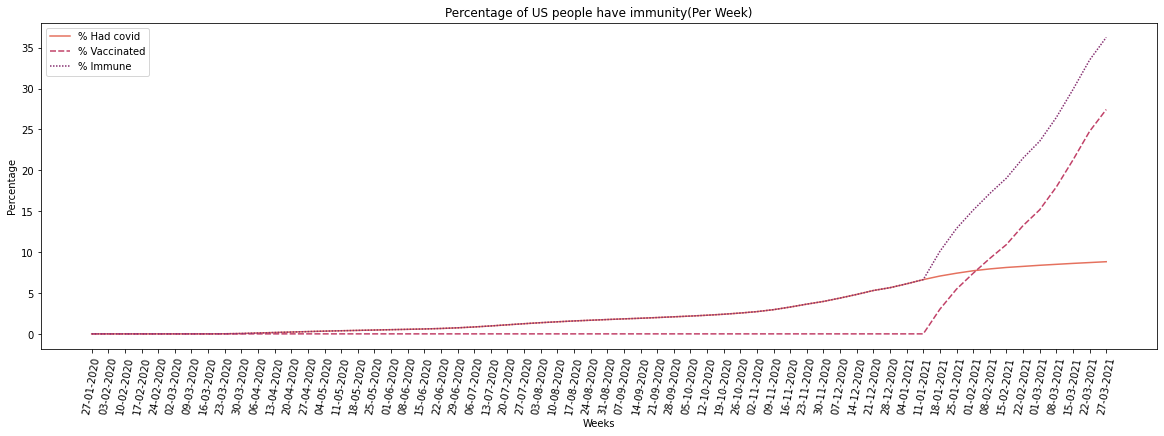

In [26]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=80)
plt.xlabel('Weeks') 
plt.ylabel('Percentage')
plt.title('Percentage of US people have immunity(Per Week)')
sns.lineplot(data=people_immunity_percent_info, palette="flare")

#### Question 6
<h4>Produce the same plot as in #5 for the states. You should have a function that takes the two
letter abbreviation for the state and produces the plot for the state. 

In [27]:
# Number of People got at least one vaccination dose per state per day. 
people_had_covid_alive_state = immunityCountCal()
people_had_covid_alive_state['location'] = people_had_covid_alive_state['State'].map(abbrev_us_state)
people_with_one_vaccine_dose_state=us_state_vaccinations_data.filter(['date','location','people_vaccinated'],axis=1)
people_with_one_vaccine_dose_state=people_with_one_vaccine_dose_state[people_with_one_vaccine_dose_state['location'].isin(state_names_list)].reset_index(drop=True)
people_with_one_vaccine_dose_state

date location  people_vaccinated
0     2021-01-12  Alabama            70861.0
1     2021-01-13  Alabama            74792.0
2     2021-01-14  Alabama            80480.0
3     2021-01-15  Alabama            86956.0
4     2021-01-16  Alabama            86956.0
...          ...      ...                ...
3845  2021-03-25  Wyoming           146634.0
3846  2021-03-26  Wyoming           146888.0
3847  2021-03-27  Wyoming           147098.0
3848  2021-03-28  Wyoming           147413.0
3849  2021-03-29  Wyoming           156608.0

[3850 rows x 3 columns]

In [28]:
# Number of People had covid and alive and people who got at least one vaccination dose per state per week. 
state_people_immunity_info=pd.merge(people_had_covid_alive_state,people_with_one_vaccine_dose_state, on=['date','location'],how='left').fillna(0)
state_people_immunity_info['date']= pd.to_datetime(state_people_immunity_info['date'])
state_people_immunity_info=state_people_immunity_info.groupby('State').resample('W-mon', label='right', closed = 'right', on='date').apply(lambda x : x.iloc[-1])
state_people_immunity_info=state_people_immunity_info.drop(['State','date'],axis=1)
state_people_immunity_info=state_people_immunity_info.reset_index()
state_people_immunity_info=state_people_immunity_info.merge(state_population,left_on='location',right_on='State_Names',how='left').reindex(columns=['State', 'date', 'Had Covid', 'location','people_vaccinated','population'])
state_people_immunity_info

State       date  Had Covid location  people_vaccinated  population
0       AK 2020-01-27          0   Alaska                0.0      731545
1       AK 2020-02-03          0   Alaska                0.0      731545
2       AK 2020-02-10          0   Alaska                0.0      731545
3       AK 2020-02-17          0   Alaska                0.0      731545
4       AK 2020-02-24          0   Alaska                0.0      731545
...    ...        ...        ...      ...                ...         ...
3157    WY 2021-03-01      53800  Wyoming            99880.0      578759
3158    WY 2021-03-08      54219  Wyoming           114824.0      578759
3159    WY 2021-03-15      54636  Wyoming           129287.0      578759
3160    WY 2021-03-22      55037  Wyoming           134800.0      578759
3161    WY 2021-03-29      55351  Wyoming           147098.0      578759

[3162 rows x 6 columns]

In [29]:
# Percentage of people have some immunity in each state per week
state_immune_percent=pd.DataFrame()
state_immune_percent=state_people_immunity_info.filter(['State','date'])                                                                             
state_immune_percent['% Had Covid'] = (state_people_immunity_info['Had Covid']/state_people_immunity_info['population'])*100
state_immune_percent['% Vaccinated'] =(state_people_immunity_info['people_vaccinated']/state_people_immunity_info['population'])*100
state_immune_percent['% Immune'] = ((state_people_immunity_info['Had Covid']+state_people_immunity_info['people_vaccinated'])/state_people_immunity_info['population'])*100
state_immune_percent['date']=state_immune_percent['date'].map(lambda tf : tf.strftime("%d-%m-%Y"))
state_immune_percent

State        date  % Had Covid  % Vaccinated   % Immune
0       AK  27-01-2020     0.000000      0.000000   0.000000
1       AK  03-02-2020     0.000000      0.000000   0.000000
2       AK  10-02-2020     0.000000      0.000000   0.000000
3       AK  17-02-2020     0.000000      0.000000   0.000000
4       AK  24-02-2020     0.000000      0.000000   0.000000
...    ...         ...          ...           ...        ...
3157    WY  01-03-2021     9.295752     17.257615  26.553367
3158    WY  08-03-2021     9.368148     19.839691  29.207840
3159    WY  15-03-2021     9.440199     22.338659  31.778858
3160    WY  22-03-2021     9.509485     23.291214  32.800699
3161    WY  29-03-2021     9.563739     25.416106  34.979845

[3162 rows x 5 columns]

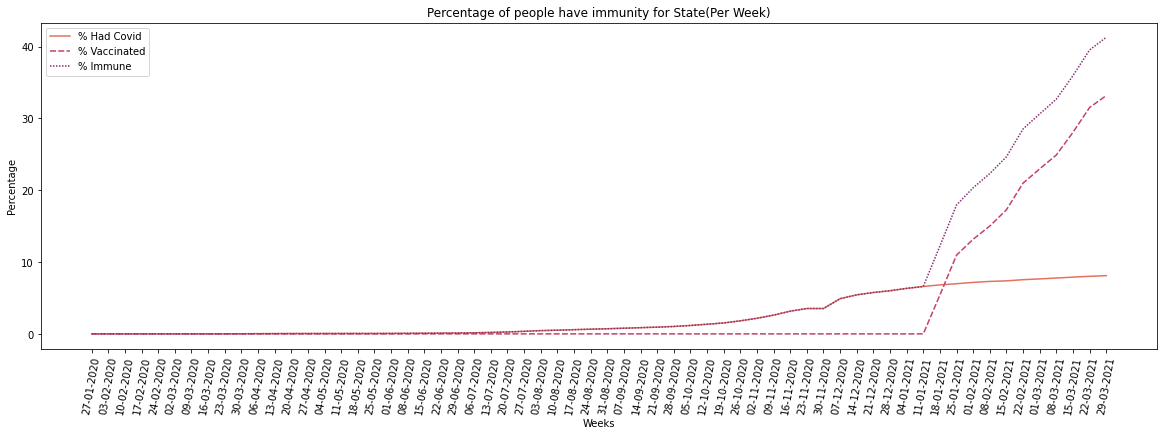

In [30]:
def statePlot(state_abbr):
    state_immune_percent_plot=state_immune_percent.copy()
    state_immune_percent_plot=state_immune_percent_plot[state_immune_percent_plot['State'].isin(state_abbr)]
    state_immune_percent_plot=state_immune_percent_plot.reset_index(drop=True)
    state_immune_percent_plot=state_immune_percent_plot.set_index('date')
    plt.figure(figsize=(20,6))
    plt.xticks(rotation=80)
    plt.xlabel('Weeks') 
    plt.ylabel('Percentage') 
    plt.title('Percentage of people have immunity for State(Per Week)')
    sns.lineplot(data=state_immune_percent_plot, palette="flare")
        
abbr=['AK']
statePlot(abbr)

#### Question 1
<h4>In us_state_vaccinations.csv there are some gaps in the data. Will those gaps affect the
results of the following questions. If no why not. If yes explain the affect.
    
        * Gaps will affect the question solved above.
        * As it is real time data the rows gets updated daily, I need latest data to compute question 2 and 3.
        * If the row updated have gap or nan which will affect my comuptaion result.
        * For question 4, 5 if there will be gaps then plot will not display the immune people % for half of the data
        * To avoid all this usiing forwardfill method and filling the gaps.